## Importing Libraries

In [60]:
## Importing Libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
#import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp = spacy.load('en',disable=['parser', 'tagger','ner'])
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump,load
import tensorflow as tf
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /Users/sumedha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sumedha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Ignoring the Warnings

In [61]:
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset
Link for dataset: https://www.gutenberg.org/files/1661/1661-0.txt

In [62]:
text = open("Sherlock.txt", 'rb').read().decode(encoding='utf-8')
print ('Book contains a total of {} characters'.format(len(text)))

Book contains a total of 594199 characters


## Data Preprocessing 
see notebook https://colab.research.google.com/drive/1WJsVfnH3kEzKkcG5CHrpBn0Q7-DUjhXt?usp=sharing for details

In [63]:
text = text [1300:]
# cleaning text by removing punctuations
def separate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n \r\n\r\n\r\n \r\n\r\n']
tokens = separate_punc(text)
# Creating Sequence of tokens
# organize into sequences of tokens
train_len = 25+1 # 50 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)
### Character to Integer Mapping
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
for i in sequences[0]:
    print(f'{i} : {tokenizer.index_word[i]}')
vocabulary_size = len(tokenizer.word_counts)
sequences = np.array(sequences)
from keras.utils import to_categorical
X = sequences[:,:-1]
# last Word
y = sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary_size+1)
seq_len = X.shape[1]

465 : i.
7 : a
981 : scandal
9 : in
1056 : bohemia
465 : i.
4 : to
136 : sherlock
36 : holmes
41 : she
16 : is
229 : always
1 : the
194 : woman
3 : i
18 : have
1832 : seldom
121 : heard
38 : him
4563 : mention
40 : her
268 : under
93 : any
96 : other
217 : name
9 : in


## Loading the model and tokenizer
Model trained in colab notebook

For details refer  https://colab.research.google.com/drive/1WJsVfnH3kEzKkcG5CHrpBn0Q7-DUjhXt?usp=sharing

In [64]:
from tensorflow.keras.models import load_model
model = load_model('lstm_model.h5', compile = False)

In [65]:
tokkenizer = load(open('lstm_token','rb'))

## Function for generating Text Sequences
    '''
    INPUTS:
    model : model that was trained on text data
    tokenizer : tokenizer that was fit on text data
    seq_len : length of training sequence
    seed_text : raw string text to serve as the seed
    num_gen_words : number of words to be generated by model
    temprature: Introduces randomness in the model
    '''

In [66]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words,temperature=1.0):

    
    # Final Output
    output_text = []
    
    # Intial Seed Sequence
    input_text = seed_text
    
    # Create num_gen_words
    for i in range(num_gen_words):
        
        # Take the input text string and encode it to a sequence
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        
        # Pad sequences to our trained rate (50 words in the video)
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        
        # Predict Class Probabilities for each word
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        
        # Grab word
        pred_word = tokenizer.index_word[pred_word_ind] 
        
        # Update the sequence of input text (shifting one over with the new word)
        input_text += ' ' + pred_word
        
        output_text.append(pred_word)
        
    # Make it look like a sentence.
    return ' '.join(output_text)

## Generating Script for Word Length = 50 and Temprature = 1

In [67]:
generated_script = generate_text(model,tokenizer,seq_len,seed_text="Watson you are",num_gen_words=50)
print(generated_script)

all machinery is given you through hand where is very such so long that miss remark is its laughed or coupled ’ judgment from all the house was the disposition of the city branch of it and save the full which he had promised to have spoken to us to


### Saving the generated Script

In [68]:
f =  open("generated_script.txt","w")
f.write(generated_script)
f.close()

### Exploring if Generated Script follows Zipfs law

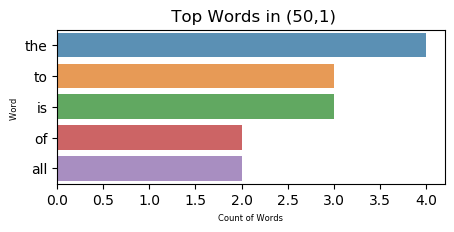

In [69]:
t1 = open("generated_script.txt", 'rb').read().decode(encoding='utf-8')
sentences1 = sent_tokenize(t1)
tokenizer1 = RegexpTokenizer('[A-Za-z]\w+')
tokens1=tokenizer1.tokenize(t1)
df1 = pd.DataFrame(tokens1)
df1 = df1[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df1:
    freqdoctor[words] += 1
df1 = df1[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df1.values, df1.index, alpha=0.8)
plt.title(' Top Words in (50,1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [70]:
vocab = sorted(set(t1))
print ('{} unique characters'.format(len(vocab)))

25 unique characters


In [155]:
len(set(t1.split()))

41

## Generating Script for Word Length = 25 and Temprature = 1

In [176]:
generated_script25 = generate_text(model,tokenizer,seq_len,seed_text="Holmes",num_gen_words=25)
print(generated_script25)

can asked gaiters a fee of calves tops of the bride the other lithe upon the rent rose while the front he was stated and


In [178]:
f25 =  open("generated_script25.txt","w")
f25.write(generated_script25)
f25.close()

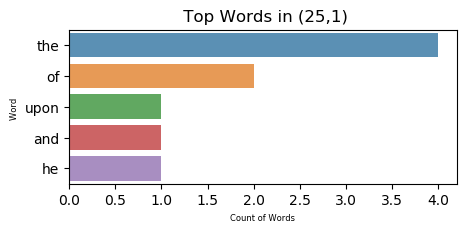

In [179]:
t25 = open("generated_script25.txt", 'rb').read().decode(encoding='utf-8')
sentences25 = sent_tokenize(t25)
tokenizer25 = RegexpTokenizer('[A-Za-z]\w+')
tokens25=tokenizer25.tokenize(t25)
df25 = pd.DataFrame(tokens25)
df25 = df25[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df25:
    freqdoctor[words] += 1
df25 = df25[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df25.values, df25.index, alpha=0.8)
plt.title(' Top Words in (25,1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [180]:
t25

'can asked gaiters a fee of calves tops of the bride the other lithe upon the rent rose while the front he was stated and'

In [182]:
len(set(t25.split()))

21

## Generating Script for Word Length = 75 and Temprature = 1

In [183]:
generated_script75 = generate_text(model,tokenizer,seq_len,seed_text="Sherlock",num_gen_words=75)
print(generated_script75)

holmes there was the name of the private indexing i could see that the reason might bring this with lord still simon but soon before this about ’s dress is provided out on winchester i do n’t think that i am myself ” he stepped once to the room and with the paper and brown the latter paragraph it was a quiet little committed his black white face was indeed ran up the seen and


In [184]:
f75 =  open("generated_script75.txt","w")
f75.write(generated_script75)
f75.close()

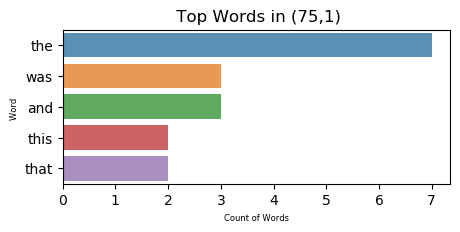

In [185]:
t75 = open("generated_script75.txt", 'rb').read().decode(encoding='utf-8')
sentences75 = sent_tokenize(t75)
tokenizer75 = RegexpTokenizer('[A-Za-z]\w+')
tokens75=tokenizer75.tokenize(t75)
df75 = pd.DataFrame(tokens75)
df75 = df75[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df75:
    freqdoctor[words] += 1
df75 = df75[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df75.values, df75.index, alpha=0.8)
plt.title(' Top Words in (75,1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [186]:
vocab = sorted(set(t75))
print ('{} unique characters'.format(len(vocab)))

27 unique characters


In [187]:
t75

'holmes there was the name of the private indexing i could see that the reason might bring this with lord still simon but soon before this about ’s dress is provided out on winchester i do n’t think that i am myself ” he stepped once to the room and with the paper and brown the latter paragraph it was a quiet little committed his black white face was indeed ran up the seen and'

In [188]:
len(set(t75.split()))

60

## Generating Script for Word Length = 100 and Temprature = 1

In [189]:
generated_script100 = generate_text(model,tokenizer,seq_len,seed_text="crime",num_gen_words=100)
print(generated_script100)

can protected out to encompass again on which walks history from thought especially public ’s own country may have explained that the second that might be seated to the easily of the house you now i may add the became of the country but now i shall order that you will away guess what he is rest else i went to the became man by hunter ’s midst us and perhaps i was too forgotten the overtook of laws and long he was hardly before myself that he was seized and to overwhelmed through it was he as remarkable as


In [190]:
f100 =  open("generated_script100.txt","w")
f100.write(generated_script100)
f100.close()

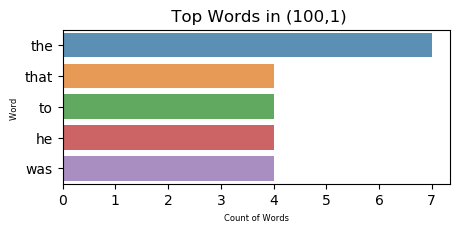

In [191]:
t100 = open("generated_script100.txt", 'rb').read().decode(encoding='utf-8')
sentences100 = sent_tokenize(t100)
tokenizer100 = RegexpTokenizer('[A-Za-z]\w+')
tokens100=tokenizer100.tokenize(t100)
df100 = pd.DataFrame(tokens100)
df100 = df100[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df100:
    freqdoctor[words] += 1
df100 = df100[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df100.values, df100.index, alpha=0.8)
plt.title(' Top Words in (100,1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [192]:
vocab = sorted(set(t75))
print ('{} unique characters'.format(len(vocab)))

27 unique characters


In [193]:
t100

'can protected out to encompass again on which walks history from thought especially public ’s own country may have explained that the second that might be seated to the easily of the house you now i may add the became of the country but now i shall order that you will away guess what he is rest else i went to the became man by hunter ’s midst us and perhaps i was too forgotten the overtook of laws and long he was hardly before myself that he was seized and to overwhelmed through it was he as remarkable as'

In [194]:
len(set(t100.split()))

68

## Generating Script for Word Length = 25 and Temprature = .1

In [195]:
generated_script25_pone = generate_text(model,tokenizer,seq_len,seed_text="Scotland yard",num_gen_words=25,temperature=.1)
print(generated_script25_pone)

and reported has been complete shrugged through the same corridor room and there is no wonder that ha that is a line of a occur


In [196]:
f25_pone =  open("generated_script25_pone.txt","w")
f25_pone.write(generated_script25_pone)
f25_pone.close()

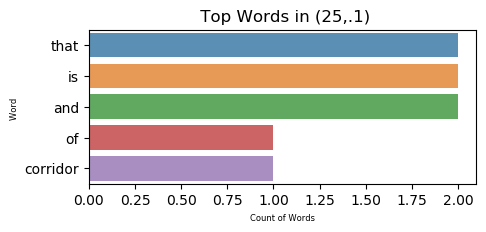

In [197]:
t25_pone = open("generated_script25_pone.txt", 'rb').read().decode(encoding='utf-8')
sentences25_pone = sent_tokenize(t25_pone)
tokenizer25_pone = RegexpTokenizer('[A-Za-z]\w+')
tokens25_pone=tokenizer25_pone.tokenize(t25_pone)
df25_pone = pd.DataFrame(tokens25_pone)
df25_pone = df25_pone[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df25_pone:
    freqdoctor[words] += 1
df25_pone = df25_pone[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df25_pone.values, df25_pone.index, alpha=0.8)
plt.title(' Top Words in (25,.1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [198]:
len(set(t25_pone.split()))

21

## Generating Script for Word Length = 50 and Temprature = .1

In [199]:
generated_script50_pone = generate_text(model,tokenizer,seq_len,seed_text="Watson",num_gen_words=50,temperature=.1)
print(generated_script50_pone)

each when we followed the back from some mark the openly preceded in spite of the slight man in the man work and the heading gave the north taken and dealings respectable 4 and of an attacked of the drug out of the help and with a small public face


In [200]:
f50_pone =  open("generated_script50_pone.txt","w")
f50_pone.write(generated_script50_pone)
f50_pone.close()

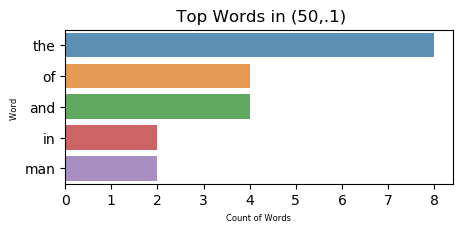

In [201]:
t50_pone = open("generated_script50_pone.txt", 'rb').read().decode(encoding='utf-8')
sentences50_pone = sent_tokenize(t50_pone)
tokenizer50_pone = RegexpTokenizer('[A-Za-z]\w+')
tokens50_pone=tokenizer50_pone.tokenize(t50_pone)
df50_pone = pd.DataFrame(tokens50_pone)
df50_pone = df50_pone[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df50_pone:
    freqdoctor[words] += 1
df50_pone = df50_pone[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df50_pone.values, df50_pone.index, alpha=0.8)
plt.title(' Top Words in (50,.1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [90]:
vocab = sorted(set(t50_pone))
print ('{} unique characters'.format(len(vocab)))

24 unique characters


In [202]:
len(set(t50_pone.split()))

35

## Generating Script for Word Length = 75 and Temprature = .1

In [203]:
generated_script75_pone = generate_text(model,tokenizer,seq_len,seed_text="good fortune",num_gen_words=75,temperature=.1)
print(generated_script75_pone)

and stone and such an hard that our foundation were eyes to replace the tattered grass and donations not and is a little little landau for included a considerable bad and may have been seeds about the subject as far as you could copy the unconscious think that there is where you earn to be all mccarthy cut they ’ opposing in complete sent came to their shown ” “ yes ” “ i say


In [204]:
f75_pone =  open("generated_script75_pone.txt","w")
f75_pone.write(generated_script75_pone)
f75_pone.close()

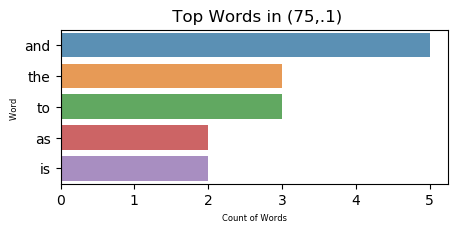

In [205]:
t75_pone = open("generated_script75_pone.txt", 'rb').read().decode(encoding='utf-8')
sentences75_pone = sent_tokenize(t75_pone)
tokenizer75_pone = RegexpTokenizer('[A-Za-z]\w+')
tokens75_pone=tokenizer75_pone.tokenize(t75_pone)
df75_pone = pd.DataFrame(tokens75_pone)
df75_pone = df75_pone[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df75_pone:
    freqdoctor[words] += 1
df75_pone = df75_pone[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df75_pone.values, df75_pone.index, alpha=0.8)
plt.title(' Top Words in (75,.1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [94]:
vocab = sorted(set(t75_pone))
print ('{} unique characters'.format(len(vocab)))

27 unique characters


In [206]:
len(set(t75_pone.split()))

59

##### Generating Script for Word Length = 100 and Temprature = .1

In [207]:
generated_script100_pone = generate_text(model,tokenizer,seq_len,seed_text="women",num_gen_words=100,temperature=.1)
print(generated_script100_pone)

together each project coat the medium a few aldersgate of faded laurel bushes grew important outside the sky and west matters beside me like a swarm of elastic every sky and the idea of the scrawled the man was cut together and there a woman part of his whole special story nothing never upon the majesty ” “ it is a confession ” groaned holmes “ yes george was my finally way to our sound written the point a man who was waiting from the afforded beneath and carefully between to the shadow of the hard and left the ambition


In [208]:
f100_pone =  open("generated_script100_pone.txt","w")
f100_pone.write(generated_script100_pone)
f100_pone.close()

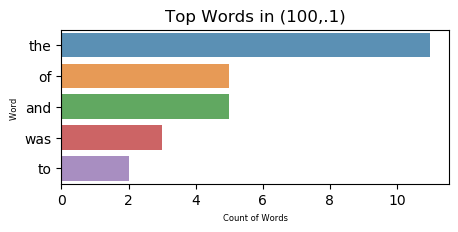

In [209]:
t100_pone = open("generated_script100_pone.txt", 'rb').read().decode(encoding='utf-8')
sentences100_pone = sent_tokenize(t100_pone)
tokenizer100_pone = RegexpTokenizer('[A-Za-z]\w+')
tokens100_pone=tokenizer100_pone.tokenize(t100_pone)
df100_pone = pd.DataFrame(tokens100_pone)
df100_pone = df100_pone[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df100_pone:
    freqdoctor[words] += 1
df100_pone = df100_pone[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df100_pone.values, df100_pone.index, alpha=0.8)
plt.title('Top Words in (100,.1)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [210]:
vocab = sorted(set(t100_pone))
print ('{} unique characters'.format(len(vocab)))

26 unique characters


In [211]:
len(set(t100_pone.split()))

70

## Generating Script for Word Length = 25 and Temprature = 2

In [212]:
generated_script25_2 = generate_text(model,tokenizer,seq_len,seed_text="to my surprise",num_gen_words=25,temperature=2)
print(generated_script25_2)

sherlock holmes left fear as i had let me go upon the silence at last nothing them wooden and the files and a very instantly


In [213]:
f25_2 =  open("generated_script25_2.txt","w")
f25_2.write(generated_script25_2)
f25_2.close()

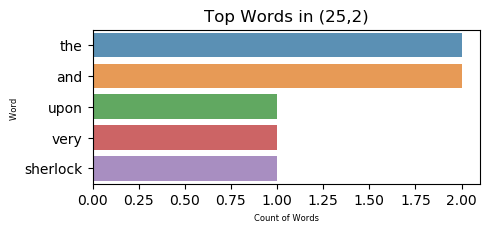

In [214]:
t25_2 = open("generated_script25_2.txt", 'rb').read().decode(encoding='utf-8')
sentences25_2 = sent_tokenize(t25_2)
tokenizer25_2 = RegexpTokenizer('[A-Za-z]\w+')
tokens25_2=tokenizer25_2.tokenize(t25_2)
df25_2 = pd.DataFrame(tokens25_2)
df25_2 = df25_2[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df25_2:
    freqdoctor[words] += 1
df25_2 = df25_2[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df25_2.values, df25_2.index, alpha=0.8)
plt.title('Top Words in (25,2)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [102]:
vocab = sorted(set(t25_2))
print ('{} unique characters'.format(len(vocab)))

22 unique characters


In [215]:
len(set(t25_2.split()))

23

## Generating Script for Word Length = 50 and Temprature = 2

In [216]:
generated_script50_2 = generate_text(model,tokenizer,seq_len,seed_text="laugh",num_gen_words=50,temperature=2)
print(generated_script50_2)

robberies three of a shriek in disappearing acid with the inspector tragedy of the spellbound sun were inches of hercules by the manager of those gaiters was of the same residence the light men and the help like being waistcoat yet in the aperture his is was as his sleeping


In [217]:
f50_2 =  open("generated_script50_2.txt","w")
f50_2.write(generated_script50_2)
f50_2.close()

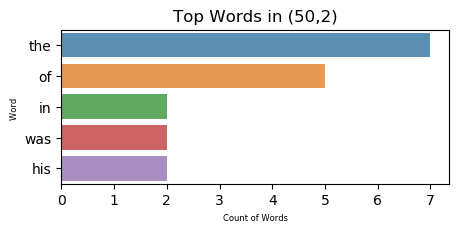

In [218]:
t50_2 = open("generated_script50_2.txt", 'rb').read().decode(encoding='utf-8')
sentences50_2 = sent_tokenize(t50_2)
tokenizer50_2 = RegexpTokenizer('[A-Za-z]\w+')
tokens50_2=tokenizer50_2.tokenize(t50_2)
df50_2 = pd.DataFrame(tokens50_2)
df50_2 = df50_2[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df50_2:
    freqdoctor[words] += 1
df50_2 = df50_2[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df50_2.values, df50_2.index, alpha=0.8)
plt.title('Top Words in (50,2)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [106]:
vocab = sorted(set(t50_2))
print ('{} unique characters'.format(len(vocab)))

22 unique characters


In [220]:
len(set(t50_2.split()))

37

### Generating Script for Word Length = 75 and Temprature = 2

In [221]:
generated_script75_2 = generate_text(model,tokenizer,seq_len,seed_text="Watson my friend",num_gen_words=75,temperature=2)
print(generated_script75_2)

attention there was a little brute absorbing large clouds gradually up and made a glass of brandy and an efforts of the shave it was even in a half black cigars made out of the stream of these bridge from examining where the blue carbuncle long the copying of the encyclopædia must be much whereabouts on which their should be eyes to discover much so as far as it were quite weary to any other


In [222]:
f75_2 =  open("generated_script75_2.txt","w")
f75_2.write(generated_script75_2)
f75_2.close()

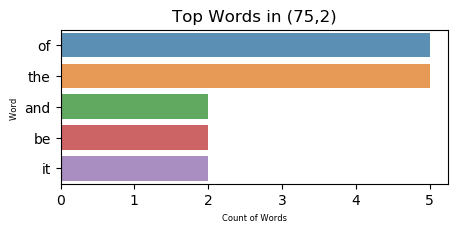

In [223]:
t75_2 = open("generated_script75_2.txt", 'rb').read().decode(encoding='utf-8')
sentences75_2 = sent_tokenize(t75_2)
tokenizer75_2 = RegexpTokenizer('[A-Za-z]\w+')
tokens75_2=tokenizer75_2.tokenize(t75_2)
df75_2 = pd.DataFrame(tokens75_2)
df75_2 = df75_2[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df75_2:
    freqdoctor[words] += 1
df75_2 = df75_2[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df75_2.values, df75_2.index, alpha=0.8)
plt.title('Top Words in (75,2)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [110]:
vocab = sorted(set(t75_2))
print ('{} unique characters'.format(len(vocab)))

26 unique characters


In [224]:
len(set(t75_2.split()))

57

## Generating Script for Word Length = 100 and Temprature = 2

In [225]:
generated_script100_2 = generate_text(model,tokenizer,seq_len,seed_text="goverment",num_gen_words=100,temperature=2)
#print(generated_script100_2)

In [226]:
f100_2 =  open("generated_script100_2.txt","w")
f100_2.write(generated_script100_2)
f100_2.close()

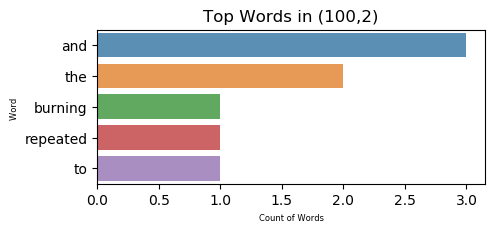

In [227]:
t100_2 = open("generated_script100_2.txt", 'rb').read().decode(encoding='utf-8')
sentences100_2 = sent_tokenize(t100_2)
tokenizer100_2 = RegexpTokenizer('[A-Za-z]\w+')
tokens100_2=tokenizer100_2.tokenize(t100_2)
df100_2 = pd.DataFrame(tokens100_2)
df100_2 = df100_2[0].value_counts()
from nltk.probability import FreqDist
freqdoctor = FreqDist()
for words in df100_2:
    freqdoctor[words] += 1
df100_2 = df100_2[:5,]
#freqdoctor
plt.figure(figsize=(5,2))
sns.barplot(df100_2.values, df100_2.index, alpha=0.8)
plt.title('Top Words in (100,2)')
plt.ylabel('Word ', fontsize=6)
plt.xlabel('Count of Words', fontsize=6)
plt.show()

In [114]:
vocab = sorted(set(t100_2))
print ('{} unique characters'.format(len(vocab)))

26 unique characters


In [228]:
len(set(t100_2.split()))

28

## Generating Script for Word Length = 50 and Temprature = .5

In [129]:
generated_script50p5 = generate_text(model,tokenizer,seq_len,seed_text="what",num_gen_words=50,temperature=.5)
print(generated_script50p5)

is used living and violates support in the dead of reading the work seen of which was whine beside the edge of the great house which had been hereditary sense hands across to its crop to explain you through the first hand of ballarat in the fancier faced hat which


In [130]:
f50p5 =  open("generated_script50p5.txt","w")
f50p5.write(generated_script50p5)
f50p5.close()

## Generating Script for Word Length = 50 and Temprature = 1.5

In [134]:
generated_script50_1p5 = generate_text(model,tokenizer,seq_len,seed_text="beleive",num_gen_words=50,temperature=1.5)
#print(generated_script50_1p5)

In [135]:
f50_1p5 =  open("generated_script50_1p5.txt","w")
f50_1p5.write(generated_script50_1p5)
f50_1p5.close()

## Generating Script for Word Length = 50 and Temprature = 2.5

In [137]:
generated_script50_2p5 = generate_text(model,tokenizer,seq_len,seed_text="crime scene",num_gen_words=50,temperature=2.5)
print(generated_script50_2p5)

behind the white curling edge which are thrown at a manner bow on peeped on a shoulders face which is over the house a show plain man hair crystallised the smaller observe of the front of his lantern and left the date of the sea indexing i do not touch


In [138]:
f50_2p5 =  open("generated_script50_2p5.txt","w")
f50_2p5.write(generated_script50_2p5)
f50_2p5.close()

## Generating Script for Word Length = 50 and Temprature = 3

In [140]:
generated_script50_3p5 = generate_text(model,tokenizer,seq_len,seed_text="dreams",num_gen_words=50,temperature=3)
print(generated_script50_3p5)

the edge there was breaches crushed and violates support in a poisoning this and door to the same corridor by the odessa vault of water which trafalgar him to come investment we had just a very asked witted carried under the irene world against me by order to prevent the


In [141]:
f50_3p5 =  open("generated_script50_3p5.txt","w")
f50_3p5.write(generated_script50_3p5)
f50_3p5.close()